## Student Depression

**Reading The CSV File Into A Pandas DataFrame**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\DataQuest\Projects\Student Depression\student_depression_dataset.csv")

In [3]:
data = student.copy()

In [4]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
data = data[data['Financial Stress'] != '?']
data['Financial Stress'] = data['Financial Stress'].str.replace("'", "")
data['Financial Stress'] = data['Financial Stress'].astype(float)
data['Financial Stress'] = data['Financial Stress'].astype(int)

**The DataFrame Has No Null Values And No Duplicates So No Further Cleaning Is Needed To Start The Analysis Part**

## Data Analysis

**The Question We Need To Answer Is What Is The Factor That Has A Relationship With Student's Depression?**

In [7]:
dataa = data.copy()
dataa['Depression'] = dataa['Depression'].apply(lambda x: 'Depression' if x == 1 else 'No Depression')

depression_perc = dataa['Depression'].value_counts(normalize=True)*100
depression_perc

Depression
Depression       58.552584
No Depression    41.447416
Name: proportion, dtype: float64

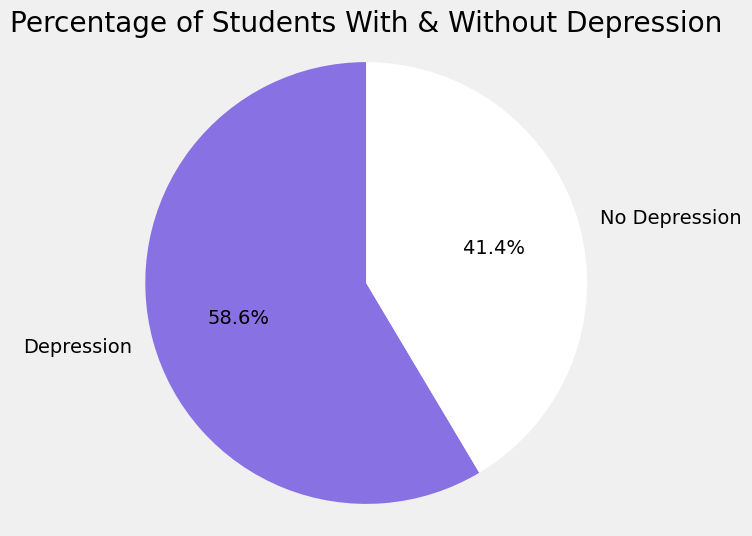

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.pie(depression_perc, labels=depression_perc.index, autopct='%1.1f%%', startangle=90, colors=['#8871e3', '#ffffff'])
plt.title('Percentage of Students With & Without Depression')
plt.axis('equal') 
plt.show()

In [9]:
depression_data = data[data['Depression'] == 1]
depression_data = depression_data[depression_data['Profession'] == 'Student']

no_depression = data[data['Depression'] == 0]
no_depression = no_depression[no_depression['Profession'] == 'Student']

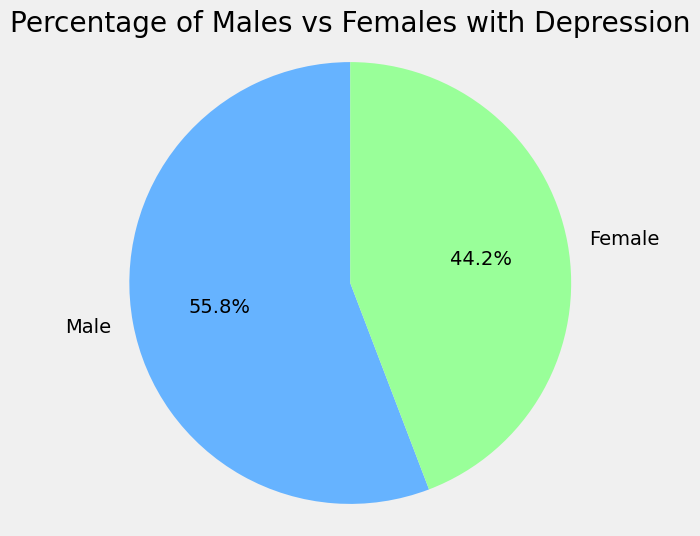

In [10]:
gender = depression_data['Gender'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Percentage of Males vs Females with Depression')
plt.axis('equal') 
plt.show()

In [11]:
depression_data['Age'] = depression_data['Age'].astype(int)
depression_data['Age'] = depression_data['Age'].astype(str)

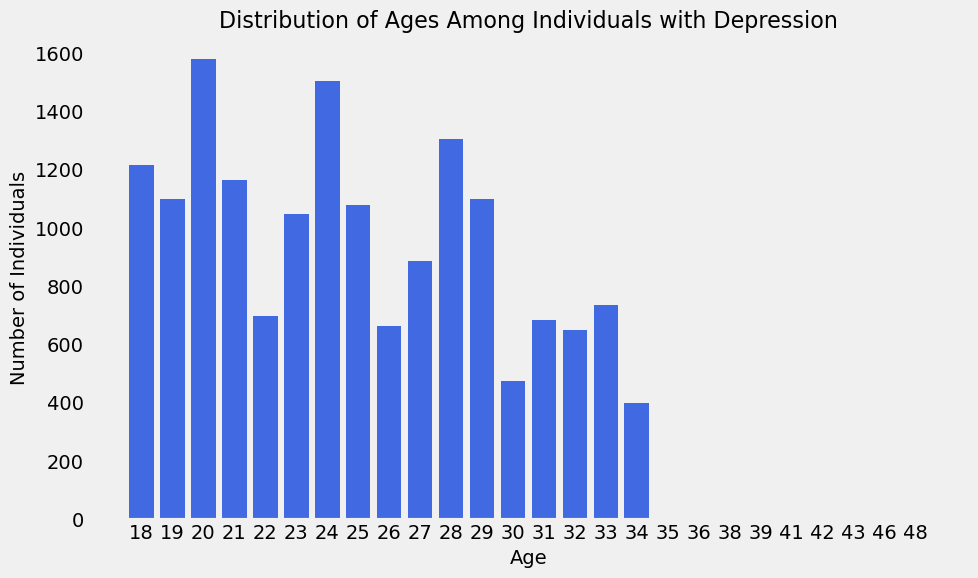

In [12]:
age = depression_data['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age.index, age.values, color='royalblue')
plt.title('Distribution of Ages Among Individuals with Depression', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

**Sleep Duration Analysis**

In [13]:
sleep = depression_data['Sleep Duration'].value_counts()
sleep

Sleep Duration
'Less than 5 hours'    5354
'7-8 hours'            4362
'5-6 hours'            3512
'More than 8 hours'    3070
Others                    9
Name: count, dtype: int64

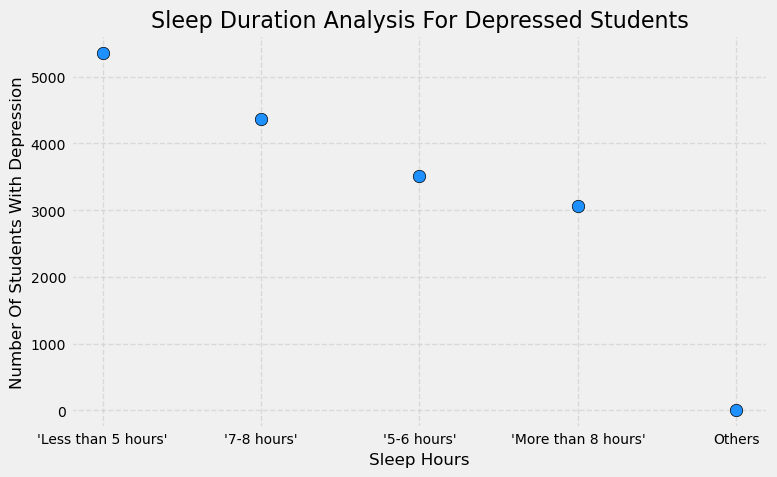

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(sleep.index, sleep.values, color='dodgerblue', s=80, edgecolors='black')
plt.title("Sleep Duration Analysis For Depressed Students", fontsize=16)
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Number Of Students With Depression", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
sleepp = no_depression['Sleep Duration'].value_counts()
sleepp

Sleep Duration
'7-8 hours'            2975
'More than 8 hours'    2965
'Less than 5 hours'    2948
'5-6 hours'            2663
Others                    9
Name: count, dtype: int64

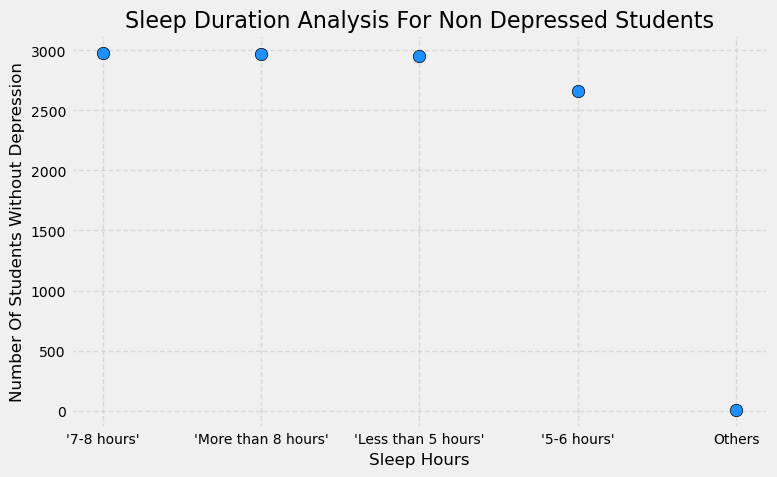

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(sleepp.index, sleepp.values, color='dodgerblue', s=80, edgecolors='black')
plt.title("Sleep Duration Analysis For Non Depressed Students", fontsize=16)
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Number Of Students Without Depression", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Sleep Duration Analysis Conclusion:**
- Students experiencing depression tend to sleep fewer hours, with 54.4% of them reporting 6 hours of sleep or less.
- On the other hand, students who do not suffer from depression generally get more sleep, as 51.37% of them report sleeping 7 hours or more.

**Financial Stress Analysis**

In [17]:
finances = depression_data['Financial Stress'].value_counts().sort_index()
finances

Financial Stress
1    1628
2    2172
3    3074
4    3986
5    5447
Name: count, dtype: int64

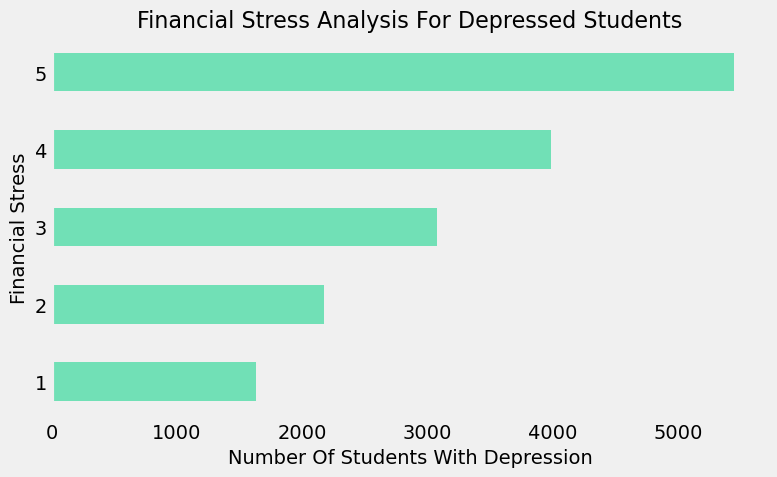

In [68]:
plt.figure(figsize=(8, 5))
plt.barh(finances.index, finances.values, color='#71e0b6', height=0.5)
plt.title('Financial Stress Analysis For Depressed Students', fontsize=16)
plt.xlabel('Number Of Students With Depression', fontsize=14)
plt.ylabel('Financial Stress', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

In [19]:
financess = no_depression['Financial Stress'].value_counts().sort_index()
financess

Financial Stress
1    3488
2    2886
3    2145
4    1784
5    1257
Name: count, dtype: int64

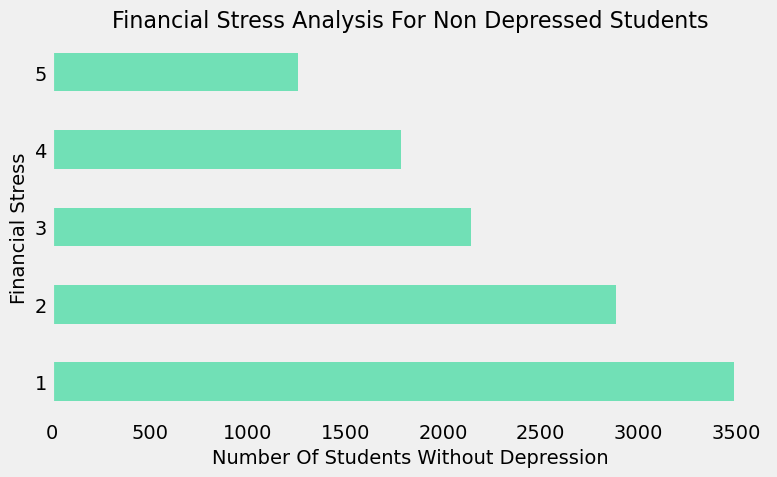

In [69]:
plt.figure(figsize=(8, 5))
plt.barh(financess.index, financess.values, color='#71e0b6', height=0.5)
plt.title('Financial Stress Analysis For Non Depressed Students', fontsize=16)
plt.xlabel('Number Of Students Without Depression', fontsize=14)
plt.ylabel('Financial Stress', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

**Financial Stress Analysis Conclusion:**
- Financial stress appears to be a significant factor in student depression. The two bar charts above clearly illustrate a strong correlation: as financial stress increases, the number of students experiencing depression rises, while the number of students without depression declines. Conversely, lower financial stress is associated with fewer cases of depression and a higher number of students who do not suffer from it. 

**Study Hours Analysis**

In [21]:
study_hours = depression_data['Work/Study Hours'].value_counts().sort_index()
study_hours

Work/Study Hours
0.0      603
1.0      462
2.0      692
3.0      694
4.0      812
5.0      703
6.0     1288
7.0     1176
8.0     1567
9.0     1213
10.0    2975
11.0    1958
12.0    2164
Name: count, dtype: int64

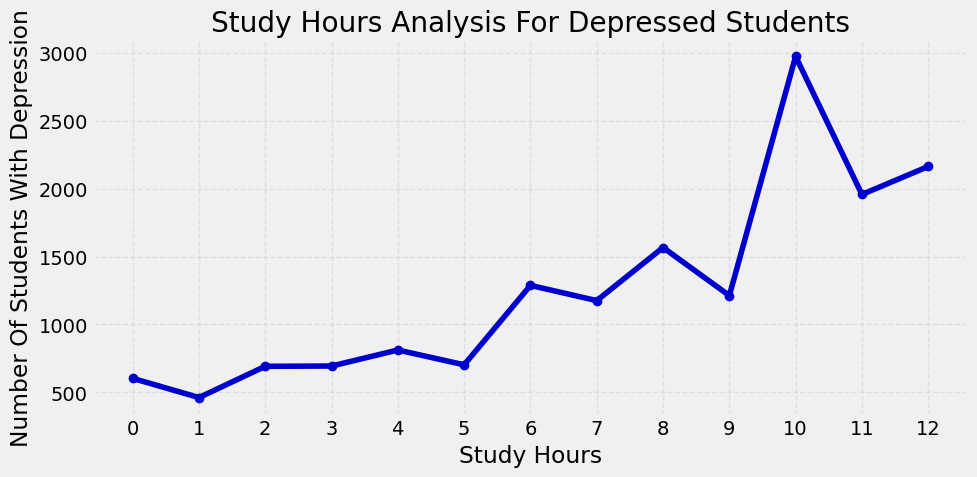

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(study_hours.index, study_hours.values, marker='o', linestyle='-', color='mediumblue')

plt.xlabel("Study Hours")
plt.ylabel("Number Of Students With Depression")
plt.title("Study Hours Analysis For Depressed Students")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(study_hours.index)
plt.tight_layout()
plt.show()

In [23]:
study_hourss = no_depression['Work/Study Hours'].value_counts().sort_index()
study_hourss

Work/Study Hours
0.0     1096
1.0      686
2.0      894
3.0      773
4.0      799
5.0      588
6.0      959
7.0      825
8.0      941
9.0      811
10.0    1255
11.0     932
12.0    1001
Name: count, dtype: int64

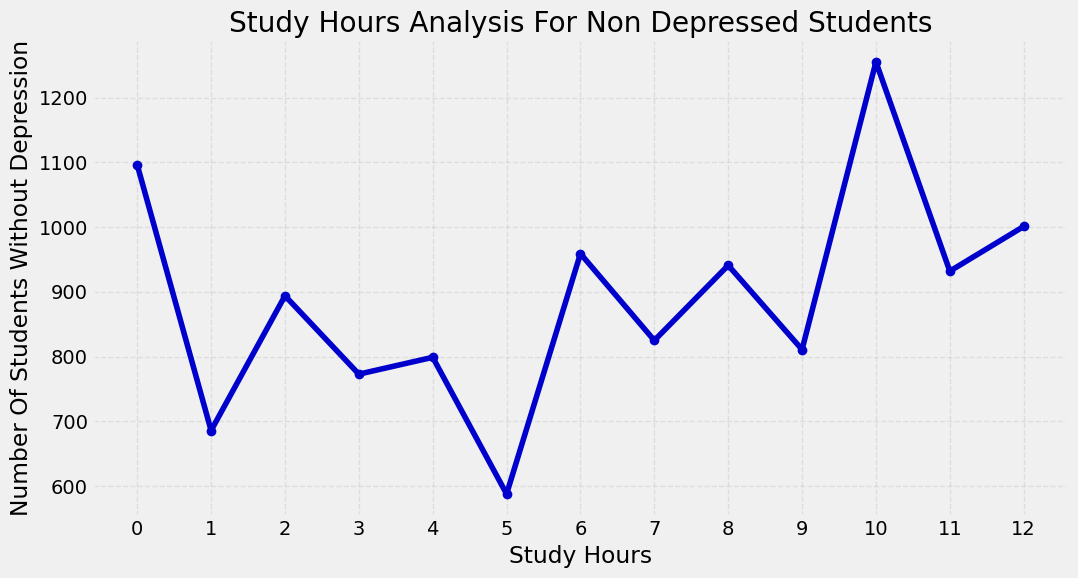

In [71]:
plt.figure(figsize=(11, 6))
plt.plot(study_hourss.index, study_hourss.values, marker='o', linestyle='-', color='mediumblue')

plt.xlabel("Study Hours")
plt.ylabel("Number Of Students Without Depression")
plt.title("Study Hours Analysis For Non Depressed Students")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(study_hourss.index)
plt.tight_layout()
plt.show()

**Study Hours Analysis Conclusion:**
- Students experiencing depression tend to dedicate more time to studying, with only 24.3% of them studying fewer than 6 hours per day.
- In contrast, students who do not experience depression exhibit no consistent pattern in their study hours. However, a larger proportion—41.83%—study less than 6 hours per day, indicating a tendency toward shorter study durations.
- Notably, a significant number of students without depression report not studying at all (0 study hours), whereas the number of students with depression who report zero study hours is considerably lower.

**Academic Pressure Analysis**

In [25]:
depression_data = depression_data[depression_data['Academic Pressure'] != 0.0]

academic_pressure = depression_data['Academic Pressure'].value_counts().sort_index()
academic_pressure

Academic Pressure
1.0     932
2.0    1564
3.0    4476
4.0    3921
5.0    5410
Name: count, dtype: int64

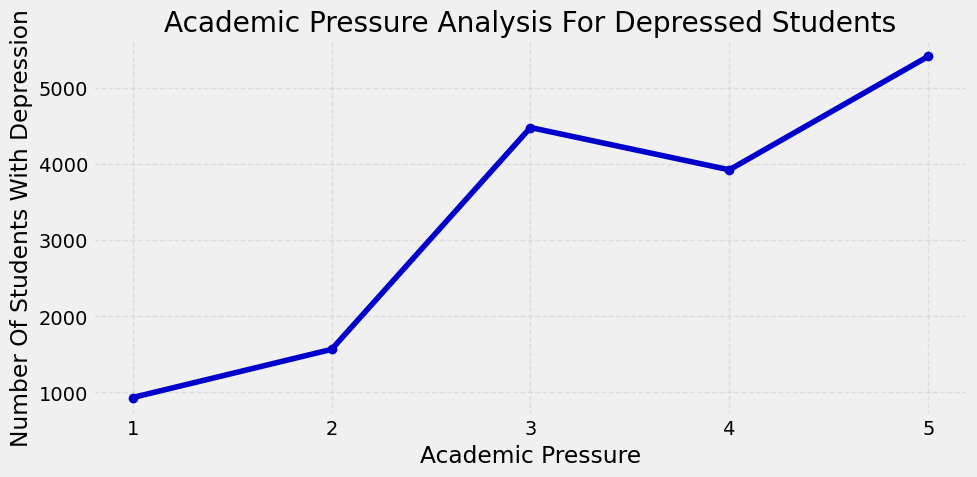

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(academic_pressure.index, academic_pressure.values, marker='o', linestyle='-', color='mediumblue')

plt.xlabel("Academic Pressure")
plt.ylabel("Number Of Students With Depression")
plt.title("Academic Pressure Analysis For Depressed Students")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(academic_pressure.index)
plt.tight_layout()
plt.show()

In [27]:
no_depression = no_depression[no_depression['Academic Pressure'] != 0.0]

academic_pressuree = no_depression['Academic Pressure'].value_counts().sort_index()
academic_pressuree

Academic Pressure
1.0    3867
2.0    2611
3.0    2972
4.0    1229
5.0     876
Name: count, dtype: int64

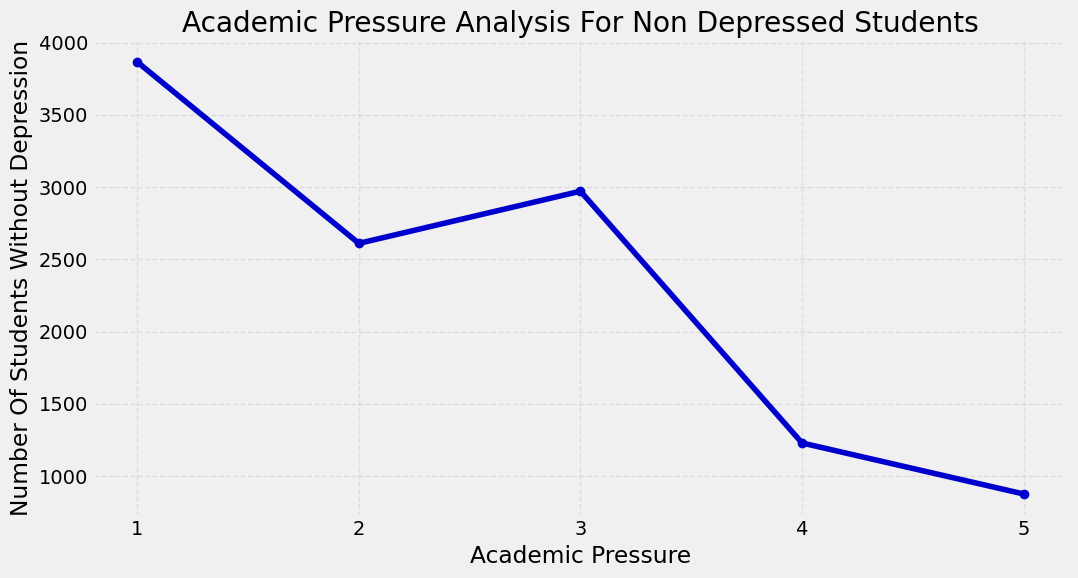

In [74]:
plt.figure(figsize=(11, 6))
plt.plot(academic_pressuree.index, academic_pressuree.values, marker='o', linestyle='-', color='mediumblue')

plt.xlabel("Academic Pressure")
plt.ylabel("Number Of Students Without Depression")
plt.title("Academic Pressure Analysis For Non Depressed Students")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(academic_pressuree.index)
plt.tight_layout()
plt.show()

**Academic Pressure Analysis Conclusion:**
- Academic pressure demonstrates a positive correlation with depression among students—as academic pressure increases, the number of students experiencing depression also rises.
- In contrast, academic pressure shows a negative correlation with students who do not suffer from depression. Higher levels of academic pressure are associated with a decrease in the number of students without depression.

**Cumulative GPA Analysis**

In [29]:
depression_data['CGPA'] = depression_data['CGPA'].apply(lambda x: 'Low' if x <= 2 else
                                                        'Good' if x <= 5 else 
                                                        'Very Good' if x <= 8 else 
                                                        'Excellent' )

In [30]:
gpa = depression_data['CGPA'].value_counts()
gpa

CGPA
Very Good    8689
Excellent    7613
Low             1
Name: count, dtype: int64

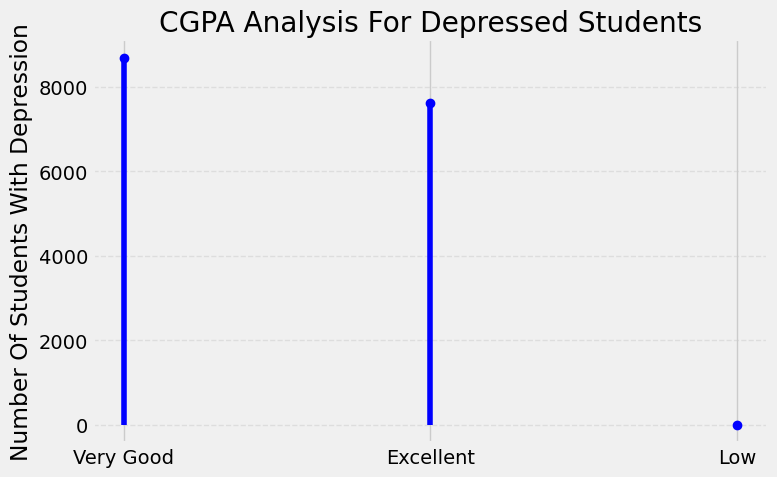

In [75]:
plt.figure(figsize=(8, 5))
plt.stem(gpa.index, gpa.values, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.ylabel('Number Of Students With Depression')
plt.title('CGPA Analysis For Depressed Students')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
no_depression['CGPA'] = no_depression['CGPA'].apply(lambda x: 'Low' if x <= 2 else
                                                        'Good' if x <= 5 else 
                                                        'Very Good' if x <= 8 else 
                                                        'Excellent' )

In [33]:
gpaa = no_depression['CGPA'].value_counts()
gpaa

CGPA
Very Good    6613
Excellent    4940
Low             2
Name: count, dtype: int64

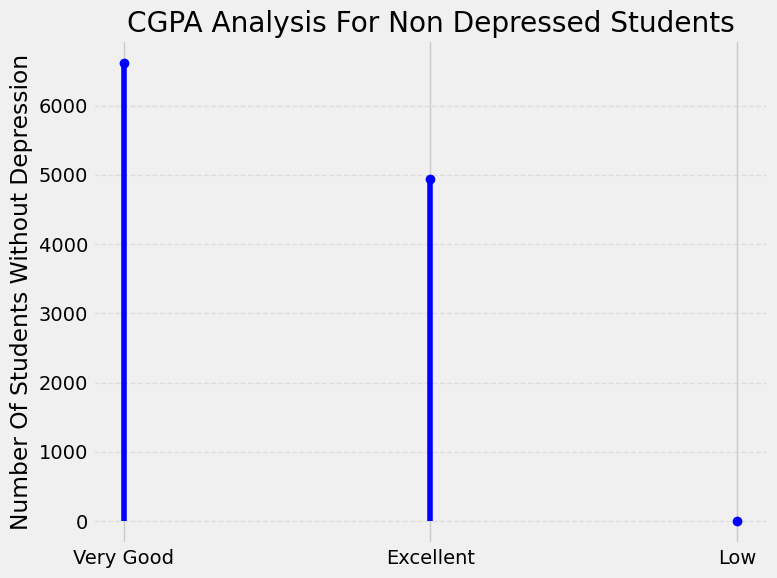

In [76]:
plt.figure(figsize=(8, 6))
plt.stem(gpaa.index, gpaa.values, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.ylabel('Number Of Students Without Depression')
plt.title('CGPA Analysis For Non Depressed Students')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Cumulative GPA Analysis Conclusion:**
- Based on the two charts above, it is evident that CGPA does not appear to be a factor influencing, or influenced by, depression. Students both suffering and not suffering from depression demonstrate similarly high CGPA levels, indicating no clear correlation between academic performance and depression.

**Family History of Mental Illness Analysis**

In [35]:
depression_data['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
Yes    8256
No     8047
Name: count, dtype: int64

In [36]:
no_depression['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     6331
Yes    5224
Name: count, dtype: int64

**Family History of Mental Illness Analysis Conclusion:**
- There is no correlation between family history of mental illness and depression of students.

**Overall Conclusion:**
- Students experiencing depression tend to sleep fewer hours compared to those who do not experience depression.
- Financial stress is positively correlated with depression among students.
- Students with depression tend to spend more time studying, potentially as a coping mechanism.
- Academic pressure also shows a clear positive correlation with student depression.
- CGPA appears to have no significant correlation with depression, as both groups—depressed and non-depressed—display high academic performance.
- Also family history of mental illness appears to have no correlation with depression of students.

These findings highlight the impact of depression on sleep patterns, likely due to factors such as overthinking or emotional distress. Furthermore, financial stress and academic pressure emerge as key contributors to students’ mental health struggles. The tendency of depressed students to study more may reflect a form of escapism, using academic engagement to avoid negative thoughts or emotions.

This is further supported by the stark difference in the number of students who report zero study hours—a significantly higher percentage among those without depression. This may suggest that students with depression either lack a vibrant social life or prefer to isolate themselves, potentially avoiding interaction with others.

## Depression Prediction

**Prepairing The DataFrame For Model Training**

- Male: Replaced with 0
- Female: Replaced with 1

In [37]:
data['Gender'] = data['Gender'].str.replace('Male', '0').str.replace('Female', '1').astype(int)

Filtering Students Only

In [38]:
data = data[data['Profession'] == 'Student']

In [39]:
data['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8302
'7-8 hours'            7337
'5-6 hours'            6175
'More than 8 hours'    6035
Others                   18
Name: count, dtype: int64

- Less than 5 hours: Replaced with 1
- 5-6 hours: Replaced with 2
- 7-8 hours: Replaced with 3
- More than 8 hours: Replaced with 4
- Others: Replaced with 5

In [40]:
data['Sleep Duration'] = data['Sleep Duration'].str.replace('Less than 5 hours', '1').str.replace('5-6 hours', '2').str.replace('7-8 hours', '3').str.replace('More than 8 hours', '4').str.replace('Others', '5')

In [41]:
data['Sleep Duration'] = data['Sleep Duration'].str.replace("'", "").astype(int)

In [42]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10308
Moderate      9910
Healthy       7637
Others          12
Name: count, dtype: int64

- Unhealthy: Replaced with 1
- Moderate: Replaced with 2
- Healthy: Replaced with 3
- Others: Replaced with 4

In [43]:
data['Dietary Habits'] = data['Dietary Habits'].str.replace('Unhealthy', '1').str.replace('Moderate', '2').str.replace('Healthy', '3').str.replace('Others', '4').astype(int)

In [44]:
data['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

Replacing the string degrees with numeric values according to the map in the cell below:

In [45]:
qualification_mapping = {
    'B.Pharm': 1, 'BSc': 2, 'BA': 3, 'BCA': 4, 'M.Tech': 5, 'PhD': 6,
    "'Class 12'": 7, 'B.Ed': 8, 'LLB': 9, 'BE': 10, 'M.Ed': 11, 'MSc': 12,
    'BHM': 13, 'M.Pharm': 14, 'MCA': 15, 'MA': 16, 'B.Com': 17, 'MD': 18,
    'MBA': 19, 'MBBS': 20, 'M.Com': 21, 'B.Arch': 22, 'LLM': 23, 'B.Tech': 24,
    'BBA': 25, 'ME': 26, 'MHM': 27, 'Others': 28
}

data['Degree'] = data['Degree'].map(qualification_mapping)

- Yes: Replaced with 1
- No: Replaced with 2

In [46]:
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].str.replace('Yes', '1').str.replace('No', '0').astype(int)

- Yes: Replaced with 1
- No: Replaced with 2

In [47]:
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].str.replace('Yes', '1').str.replace('No', '0').astype(int)

In [48]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2,3,1,1,3.0,1,0,1
1,8,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2,2,2,0,3.0,2,1,0
2,26,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1,3,3,0,9.0,1,1,0
3,30,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3,2,4,1,4.0,5,1,1
4,32,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2,2,5,1,1.0,1,0,0


In [49]:
data.reset_index(inplace=True)

In [50]:
data['Age'] = data['Age'].astype(int)

In [51]:
data.head()

,index,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,2,0,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,2,3,1,1,3.0,1,0,1
1,1,8,1,24,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,2,2,2,0,3.0,2,1,0
2,2,26,0,31,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,1,3,3,0,9.0,1,1,0
3,3,30,1,28,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,3,2,4,1,4.0,5,1,1
4,4,32,1,25,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,2,2,5,1,1.0,1,0,0


In [52]:
data = data[['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration',
             'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
            'Financial Stress', 'Family History of Mental Illness', 'Depression']]

In [53]:
data.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,5.0,0.0,8.97,2.0,2,3,1,1,3.0,1,0,1
1,1,24,2.0,0.0,5.90,5.0,2,2,2,0,3.0,2,1,0
2,0,31,3.0,0.0,7.03,5.0,1,3,3,0,9.0,1,1,0
3,1,28,3.0,0.0,5.59,2.0,3,2,4,1,4.0,5,1,1
4,1,25,4.0,0.0,8.13,3.0,2,2,5,1,1.0,1,0,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27867 entries, 0 to 27866
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  int32  
 1   Age                                    27867 non-null  int32  
 2   Academic Pressure                      27867 non-null  float64
 3   Work Pressure                          27867 non-null  float64
 4   CGPA                                   27867 non-null  float64
 5   Study Satisfaction                     27867 non-null  float64
 6   Sleep Duration                         27867 non-null  int32  
 7   Dietary Habits                         27867 non-null  int32  
 8   Degree                                 27867 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27867 non-null  int32  
 10  Work/Study Hours                       27867 non-null  float64
 11  Fi

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

In [56]:
X = data.drop(columns=['Depression'])
y = data['Depression']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=417)

In [58]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('clf', LGBMClassifier(random_state=42))
])

In [59]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, -1],
    'clf__learning_rate': [0.01, 0.1]
}

In [60]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

D:\jupyter\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13045, number of negative: 13045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 26090, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('clf',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__learning_rate': [0.01, 0.1],
                         'clf__max_depth': [5, 10, -1],
                         'clf__n_estimators': [100, 200]},
             scoring='accuracy')

In [61]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

D:\jupyter\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8529
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2312
           1       0.87      0.89      0.88      3262

    accuracy                           0.85      5574
   macro avg       0.85      0.85      0.85      5574
weighted avg       0.85      0.85      0.85      5574



**Model Performance Summary:**

- **Accuracy**: 85.29%

- **Precision (class 1)**: 0.87 → Few false positives

- **Recall (class 1)**: 0.89 → Most depressed students are caught

- **F1-score (class 1)**: 0.88 → Strong balance